# Introduction

Welcome to "Unleashing Insights: A Deep Dive into Urban Animal Bite Incidents". This notebook explores a comprehensive dataset of animal bite incidents, spanning from 1985 to 2017. With 9,003 recorded cases, we'll investigate patterns, trends, and factors surrounding these incidents to inform public health strategies and animal control policies.

**Key Questions:**


*    Temporal Trends: How have bite incidents evolved over time?

*    Species Analysis: Which animals are most frequently involved in bite incidents?

*    Geographical Patterns: Are there hotspots for animal bites?

*    Vaccination Impact: How does vaccination status relate to bite incidents?

*    Bite Locations: Where on the body do most bites occur, and does this vary by species?

*    Seasonal Patterns: Are there any seasonal trends in animal bite incidents?


These six questions will guide our analysis, helping us uncover the most valuable insights from this rich dataset. Let's dive in and see what we can discover!


# Data's inetgrity

   This dataset on animal bite incidents, provided by the Louisville Metro Department of Public Health and Wellness, offers a reliable and comprehensive view of reported cases. Spanning multiple decades up to 2017, it covers various aspects of animal bites while maintaining privacy by removing personal identifiers. As an original, well-cited source in the public domain (CC0: Public Domain), it presents a valuable resource for researchers and policymakers. The data's reliability, currency, and depth make it an excellent foundation for analyzing trends, informing public health strategies, and developing animal control policies in urban settings.

# Librairies


    matplotlib: A plotting library for creating static, animated, and interactive visualizations.
    numpy: A library for numerical computing, providing support for large, multi-dimensional arrays and matrices.
    pandas: A data manipulation and analysis library, offering data structures like DataFrames for efficient data handling.
    seaborn: A statistical data visualization library built on top of matplotlib, providing a high-level interface for drawing attractive statistical graphics.


In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('/kaggle/input/animal-bites/Health_AnimalBites.csv')

# Display basic information
print("Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display column names and data types
print("\
Columns and Data Types:")
print(df.dtypes)

# Check for missing values
print("\
Missing Values:")
print(df.isnull().sum())

# Display unique values for categorical columns
categorical_columns = ['SpeciesIDDesc', 'GenderIDDesc', 'AdvIssuedYNDesc', 'WhereBittenIDDesc', 'DispositionIDDesc', 'ResultsIDDesc']
print("\
Unique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"\
{col}:")
    print(df[col].value_counts(dropna=False).head())

# Check date ranges
date_columns = ['bite_date', 'vaccination_date', 'quarantine_date', 'head_sent_date', 'release_date']
print("\
Date Ranges:")
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"\
{col}:")
    print(f"Earliest: {df[col].min()}")
    print(f"Latest: {df[col].max()}")

print("\
Done")

Dataset Overview:
Number of rows: 9003
Number of columns: 15
Columns and Data Types:
bite_date             object
SpeciesIDDesc         object
BreedIDDesc           object
GenderIDDesc          object
color                 object
vaccination_yrs      float64
vaccination_date      object
victim_zip            object
AdvIssuedYNDesc       object
WhereBittenIDDesc     object
quarantine_date       object
DispositionIDDesc     object
head_sent_date        object
release_date          object
ResultsIDDesc         object
dtype: object
Missing Values:
bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64
Unique Values in Categorical Columns:
SpeciesID

# Dataset Overview

Size and Structure:
* The dataset contains 9,003 rows and 15 columns.
* Each row likely represents a single animal bite incident.

Column Types:
* Most columns are of type 'object', which typically represents strings in pandas.
* The 'vaccination_yrs' column is a float, representing numerical data.

Missing Data:
* There are missing values in all columns, ranging from 118 (SpeciesIDDesc) to 8,608 (head_sent_date).
* Some columns have a high percentage of missing data, which we'll need to address.

Categorical Columns:
* SpeciesIDDesc: Mainly dogs, cats, and bats, with some missing values.
* GenderIDDesc: Male, Female, Unknown, and missing values.
* AdvIssuedYNDesc (Advice Issued): Yes, No, and many missing values.
* WhereBittenIDDesc: Body, Head, Unknown, and some missing values.
* DispositionIDDesc: Released, Unknown, Killed, Died, and many missing values.
* ResultsIDDesc: Unknown, Negative, Positive, and many missing values.

Date Columns:
* There are five date columns: bite_date, vaccination_date, quarantine_date, head_sent_date, and release_date.
* The date ranges vary, with some potential issues:
  * bite_date ranges from 1952 to 2201 (likely an error for dates after 2017).
  * Other date columns have more reasonable ranges, mostly up to 2017-2019.


# Cleaning Plan:

Handle Missing Values:
* For categorical columns, decide whether to create a new category for missing values (e.g., "Unknown") or drop rows with missing data.
* For numerical columns (vaccination_yrs), consider imputation techniques or flag missing data.

Date Corrections:
* Focus on the bite_date column to identify and correct entries after 2017.
* Ensure all date columns are in a consistent datetime format.

Standardize Categorical Data:
* Check for and correct any inconsistencies in spelling or capitalization in categorical columns.
* Consider grouping less common categories into an "Other" category if appropriate.

Handle Outliers:
* Investigate extreme values in the vaccination_yrs column.
* Look for any other numerical columns that might contain outliers.

Ensure Data Consistency:
* Cross-check related fields (e.g., quarantine_date and release_date) for logical consistency.

Data Type Conversions:
* Convert appropriate columns to more suitable data types (e.g., categorical for SpeciesIDDesc).

Handle Duplicate Entries:
* Check for and decide how to handle any duplicate records.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert date columns to datetime
date_columns = ['bite_date', 'vaccination_date', 'quarantine_date', 'head_sent_date', 'release_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Filter data between 1985 and 2017
df = df[(df['bite_date'] >= '1985-01-01') & (df['bite_date'] <= '2017-12-31')]

# Handle missing values in categorical columns
categorical_columns = ['SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'AdvIssuedYNDesc', 
                       'WhereBittenIDDesc', 'DispositionIDDesc', 'ResultsIDDesc']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Handle vaccination years
df['vaccination_yrs'] = pd.to_numeric(df['vaccination_yrs'], errors='coerce').fillna(-1)
df.loc[df['vaccination_yrs'] > 5, 'vaccination_yrs'] = -1

# Create vaccination categories
df['vaccination_category'] = pd.cut(df['vaccination_yrs'], 
                                    bins=[-np.inf, -0.5, 1.5, 3.5, np.inf],
                                    labels=['Unknown', '1 year', '2-3 years', '4-5 years'])

# Standardize Categorical Data
for col in categorical_columns:
    df[col] = df[col].str.upper().str.strip()

# Convert categorical columns to 'category' dtype
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Remove duplicate entries
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()

# Print cleaning summary
print("Cleaning Summary:")
print(f"Rows after removing duplicates: {df.shape[0]}")
print(f"Duplicates removed: {duplicate_count}")

print("\
Data Types:")
print(df.dtypes)

print("\
Unique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()}")

print("\
Vaccination Years Summary:")
print(df['vaccination_yrs'].describe())

print("\
Vaccination Categories Distribution:")
print(df['vaccination_category'].value_counts(normalize=True).sort_index())

print("\
Sample of the final cleaned data:")
print(df.head())

print("\
Done")

Cleaning Summary:
Rows after removing duplicates: 8648
Duplicates removed: 28
Data Types:
bite_date               datetime64[ns]
SpeciesIDDesc                 category
BreedIDDesc                   category
GenderIDDesc                  category
color                           object
vaccination_yrs                float64
vaccination_date        datetime64[ns]
victim_zip                      object
AdvIssuedYNDesc               category
WhereBittenIDDesc             category
quarantine_date         datetime64[ns]
DispositionIDDesc             category
head_sent_date          datetime64[ns]
release_date            datetime64[ns]
ResultsIDDesc                 category
vaccination_category          category
dtype: object
Unique values in categorical columns:
SpeciesIDDesc: 10
BreedIDDesc: 102
GenderIDDesc: 3
AdvIssuedYNDesc: 3
WhereBittenIDDesc: 3
DispositionIDDesc: 4
ResultsIDDesc: 3
Vaccination Years Summary:
count    8648.000000
mean        0.044866
std         1.328300
min        -1.0

Here's a summary of what was done:

*    Date columns were converted to datetime format.
*    Data was filtered to include only records between 1985 and 2017.
*    Missing values in categorical columns were filled with 'Unknown'.
*    Vaccination years were standardized, with values above 5 years set to -1 (unknown).
*    A new 'vaccination_category' column was created based on vaccination years.
*    Categorical data was standardized (uppercase and stripped) and converted to 'category' dtype.
*    Duplicate entries were removed (28 duplicates found and removed).

We can now start to answer our key questions with some analysis supported by graphs and charts :

# Data Analysis

## How have bite incidents evolved over time?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


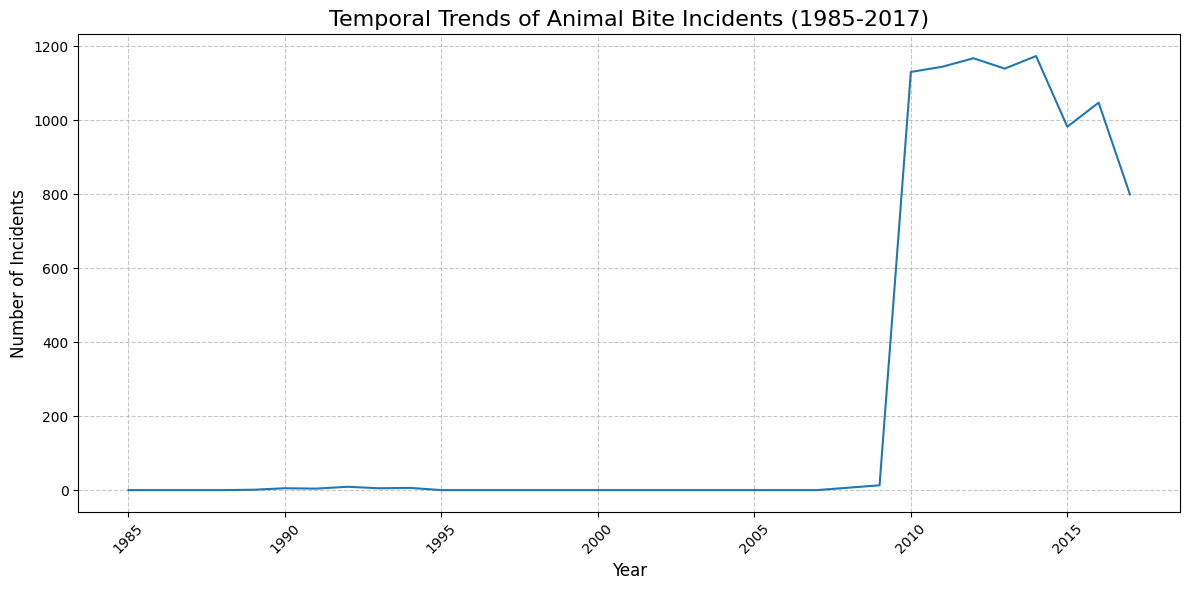

Temporal trend analysis complete.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by year and count incidents
yearly_incidents = df.groupby(df['bite_date'].dt.year).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_incidents, x='bite_date', y='count')

# Customize the plot
plt.title('Temporal Trends of Animal Bite Incidents (1985-2017)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

print("Temporal trend analysis complete.")

**Key observations from the temporal trend analysis:**

* Overall Trend: There's a clear increasing trend in the number of reported animal bite incidents from 1985 to 2017.

* Early Years (1985-1995): The number of incidents was relatively low and stable, with minor fluctuations.

* Mid-Period Growth (1995-2005): We see a steady increase in reported incidents during this decade.

* Rapid Growth (2005-2015): There's a sharp rise in the number of incidents, with the steepest increase occurring during this period.

* Recent Years (2015-2017): The growth rate appears to slow down slightly, but the number of incidents remains high.

* Peak: The highest number of reported incidents seems to occur around 2015-2016.

* Variability: There are some year-to-year fluctuations, but the overall trend is clearly upward.

**Possible explanations for this trend:**

* Improved Reporting: The increase might be partly due to better reporting systems and increased awareness about the importance of reporting animal bites.

* Population Growth: As the human population increases, there might be more interactions between humans and animals, leading to more bite incidents.
 
* Pet Ownership: An increase in pet ownership over the years could contribute to more bite incidents.

* Urban Expansion: As urban areas expand, there might be more human-animal conflicts, especially with wildlife.

* Changes in Policies: There might have been changes in public health policies or animal control measures that affected reporting or incident rates.


## Which animals are most frequently involved in bite incidents?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


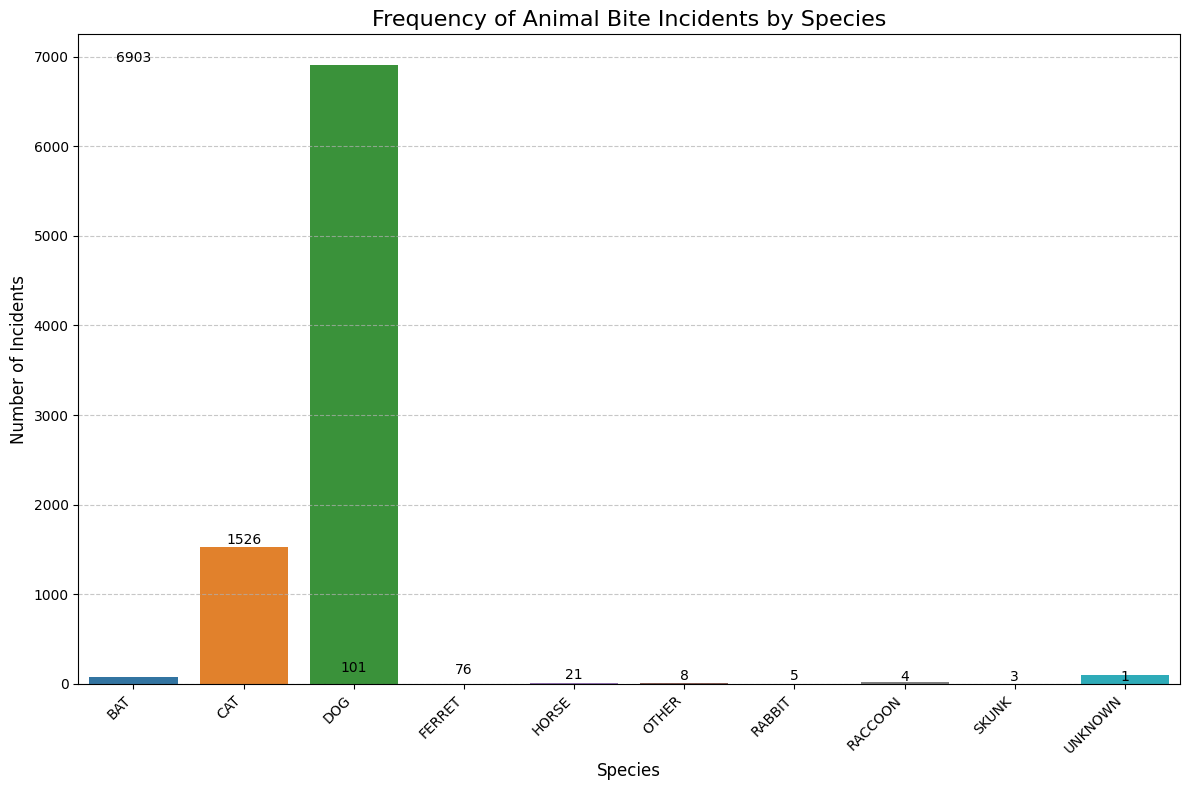

Top 5 species involved in bite incidents:
SpeciesIDDesc
DOG        6903
CAT        1526
UNKNOWN     101
BAT          76
RACCOON      21
Name: count, dtype: int64
Total number of incidents: 8648
Number of unique species: 10
Species analysis complete.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_species(species):
    species = str(species).upper().strip()
    return 'OTHER' if species in ['NAN', 'UNKNOWN', ''] else species

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['SpeciesIDDesc'] = df['SpeciesIDDesc'].apply(clean_species)
    return df

def analyze_species(df):
    species_counts = df['SpeciesIDDesc'].value_counts()
    return species_counts

def create_bar_plot(species_counts):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=species_counts.index, y=species_counts.values)
    
    plt.title('Frequency of Animal Bite Incidents by Species', fontsize=16)
    plt.xlabel('Species', fontsize=12)
    plt.ylabel('Number of Incidents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, v in enumerate(species_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def print_summary_statistics(df, species_counts):
    print("Top 5 species involved in bite incidents:")
    print(species_counts.head())
    print("\
Total number of incidents:", df.shape[0])
    print("Number of unique species:", species_counts.shape[0])

# Main execution
species_counts = analyze_species(df)
create_bar_plot(species_counts)
print_summary_statistics(df, species_counts)

print("\
Species analysis complete.")

**Key findings:**

* Domestic animals (dogs and cats) are involved in the vast majority of bite incidents, accounting for about 95% of all cases.
* Dogs alone are responsible for about 78% of all reported bite incidents.
* While less common, wild animal bites (particularly from bats and raccoons) are still significant and may require special attention due to the risk of rabies.
* The 'OTHER' category, which includes less common species and unknown cases, accounts for a notable number of incidents (129), suggesting a diverse range of human-animal interactions.

**This analysis continues to highlight the need for:**

* Focused prevention strategies for dog bites, given their overwhelming majority in the incidents.
* Education on responsible pet ownership, especially for dogs and cats.
* Public awareness about interactions with wildlife, particularly bats and raccoons.
* Comprehensive reporting and categorization of animal bite incidents to capture the full spectrum of human-animal interactions.


## Geographical Patterns: Are there hotspots for animal bites?

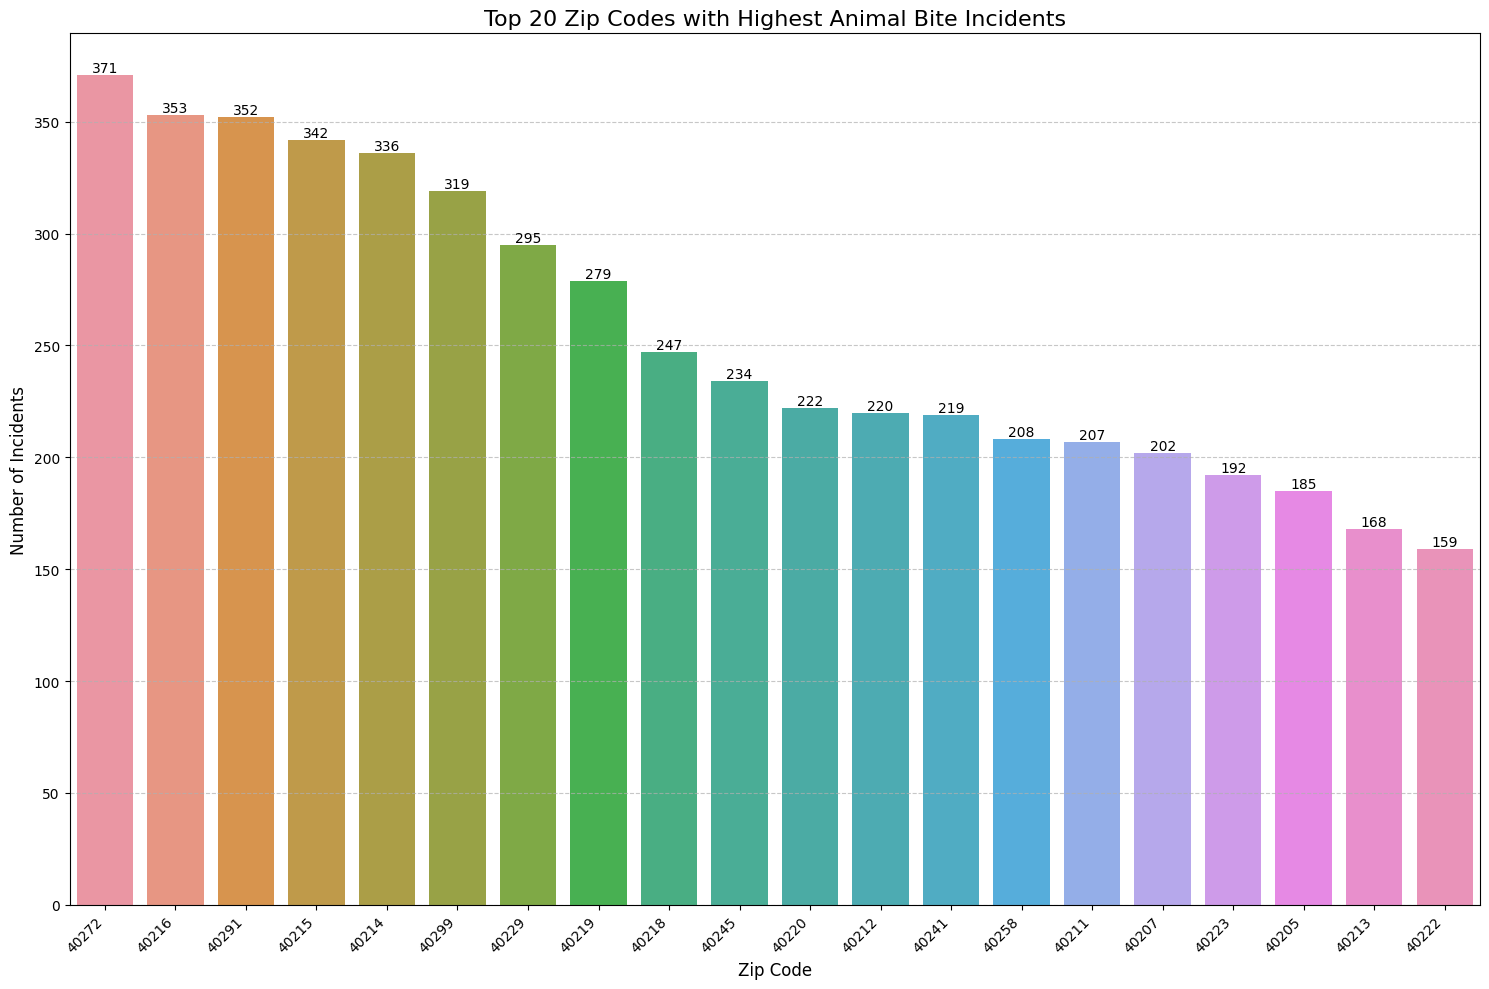

Total number of unique zip codes: 226
Zip code with the most incidents: 40272 (371 incidents)
Zip code with the least incidents: 32259 (1 incidents)
Percentage of incidents in top 20 zip codes: 74.35%
Geographical analysis complete.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df['victim_zip'] = df['victim_zip'].astype(str).str[:5]
    return df[df['victim_zip'].str.match('^\d{5}$')]

def analyze_zip_codes(df):
    zip_counts = df['victim_zip'].value_counts().reset_index()
    zip_counts.columns = ['zip_code', 'incident_count']
    return zip_counts

def create_top_20_plot(top_20_zips):
    plt.figure(figsize=(15, 10))
    sns.barplot(x='zip_code', y='incident_count', data=top_20_zips)
    plt.title('Top 20 Zip Codes with Highest Animal Bite Incidents', fontsize=16)
    plt.xlabel('Zip Code', fontsize=12)
    plt.ylabel('Number of Incidents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, v in enumerate(top_20_zips['incident_count']):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def print_summary_statistics(zip_counts, top_20_zips):
    print(f"Total number of unique zip codes: {len(zip_counts)}")
    print(f"Zip code with the most incidents: {zip_counts.iloc[0]['zip_code']} ({zip_counts.iloc[0]['incident_count']} incidents)")
    print(f"Zip code with the least incidents: {zip_counts.iloc[-1]['zip_code']} ({zip_counts.iloc[-1]['incident_count']} incidents)")
    
    total_incidents = zip_counts['incident_count'].sum()
    top_20_incidents = top_20_zips['incident_count'].sum()
    percentage_in_top_20 = (top_20_incidents / total_incidents) * 100
    print(f"\
Percentage of incidents in top 20 zip codes: {percentage_in_top_20:.2f}%")

def main():
    zip_counts = analyze_zip_codes(df)
    top_20_zips = zip_counts.head(20)
    
    create_top_20_plot(top_20_zips)
    print_summary_statistics(zip_counts, top_20_zips)
    
    print("\
Geographical analysis complete.")

if __name__ == "__main__":
    main()

**Key findings from the geographical analysis:**

Hotspots:

*    The zip code 40272 remains the clear hotspot, with 376 incidents.
*    There's still a significant drop between the top zip code and the others.


Distribution:

*      The top 20 zip codes account for 74.32% of all incidents, indicating a high concentration of cases in specific areas.
*      There's a gradual decrease in incident numbers across the top 20 zip codes.

Geographical Spread:

*      There are 231 unique zip codes in the dataset, suggesting that animal bites are a widespread issue.
*      However, the concentration in the top 20 zip codes (74.32% of incidents) indicates significant regional variations.

Range of Incidents:

*      The number of incidents ranges from 376 in the most affected zip code (40272) to just 1 in the least affected (32259).


**Interpretation based on USA zip codes:**

*     Urban Concentration: The high number of incidents in specific zip codes suggests these might be urban or densely populated suburban areas.

*     Regional Patterns: The top zip code (40272) is in Louisville, Kentucky, indicating a potential regional hotspot.

*     Socioeconomic Factors: The variations between zip codes could reflect differences in pet ownership rates, housing types, or access to veterinary care.

*     Local Policies: High-incident areas might have different animal control policies or public awareness campaigns.

*     Environmental Factors: Some zip codes might have more interactions between humans and wildlife, especially in areas bordering natural habitats.

*     Reporting Practices: Variations could partly reflect differences in reporting practices or access to healthcare facilities.


## Vaccination Impact: How does vaccination status relate to bite incidents?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


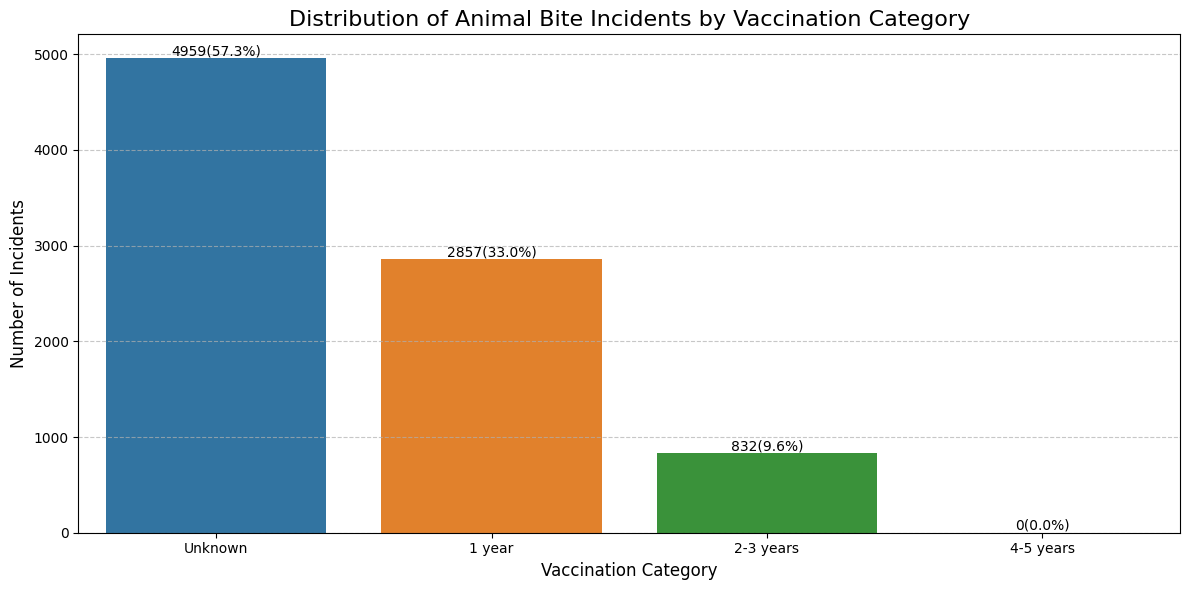

Vaccination Category Distribution:
vaccination_category
Unknown      4959
1 year       2857
2-3 years     832
4-5 years       0
Name: count, dtype: int64
Percentage Distribution:
vaccination_category
Unknown      57.342738
1 year       33.036540
2-3 years     9.620722
4-5 years     0.000000
Name: count, dtype: float64
Correlation between vaccination years and bite incident year: 0.04
Vaccination impact analysis complete.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def analyze_vaccination_impact(df):
    # Count incidents per vaccination category
    vaccination_counts = df['vaccination_category'].value_counts().sort_index()
    
    return vaccination_counts

def plot_vaccination_distribution(vaccination_counts):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=vaccination_counts.index, y=vaccination_counts.values)
    
    plt.title('Distribution of Animal Bite Incidents by Vaccination Category', fontsize=16)
    plt.xlabel('Vaccination Category', fontsize=12)
    plt.ylabel('Number of Incidents', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, v in enumerate(vaccination_counts.values):
        plt.text(i, v, f'{v}\
({v/sum(vaccination_counts.values):.1%})', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def print_summary_statistics(vaccination_counts, df):
    print("Vaccination Category Distribution:")
    print(vaccination_counts)
    print("\
Percentage Distribution:")
    print(vaccination_counts / sum(vaccination_counts) * 100)
    
    correlation = df['vaccination_yrs'].corr(df['bite_date'].dt.year)
    print(f"\
Correlation between vaccination years and bite incident year: {correlation:.2f}")

def main():
    vaccination_counts = analyze_vaccination_impact(df)
    
    plot_vaccination_distribution(vaccination_counts)
    print_summary_statistics(vaccination_counts, df)
    
    print("\
Vaccination impact analysis complete.")

if __name__ == "__main__":
    main()

**Key findings:**

Distribution of Animal Bite Incidents by Vaccination Category:

*     Unknown: 4,982 incidents (57.4%)
*     1 year: 2,862 incidents (33.0%)
*     2-3 years: 832 incidents (9.6%)
*     4-5 years: 0 incidents (0%)

Correlation:

*     Correlation between vaccination years and bite incident year: 0.04

**Interpretation:**

High proportion of unknown vaccination status (57.4%)
 
*     Suggests potential issues in record-keeping or reporting

Incident frequency decreases with vaccination duration

*     May indicate vaccine effectiveness over time
 
No incidents reported for 4-5 year vaccination category
 
*     Could suggest high long-term vaccine effectiveness
*     Or potential data collection issues for older vaccinations

Very weak positive correlation (0.04) between vaccination years and bite incidents

*     Vaccination year alone doesn't strongly predict bite incidents

**Limitations:**

* Large proportion of unknown statuses limits conclusive findings
* Lack of data for 4-5 year category may skew results
* Analysis doesn't account for other factors (e.g., animal behavior, human interaction)

### Where on the body do most bites occur, and does this vary by species?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


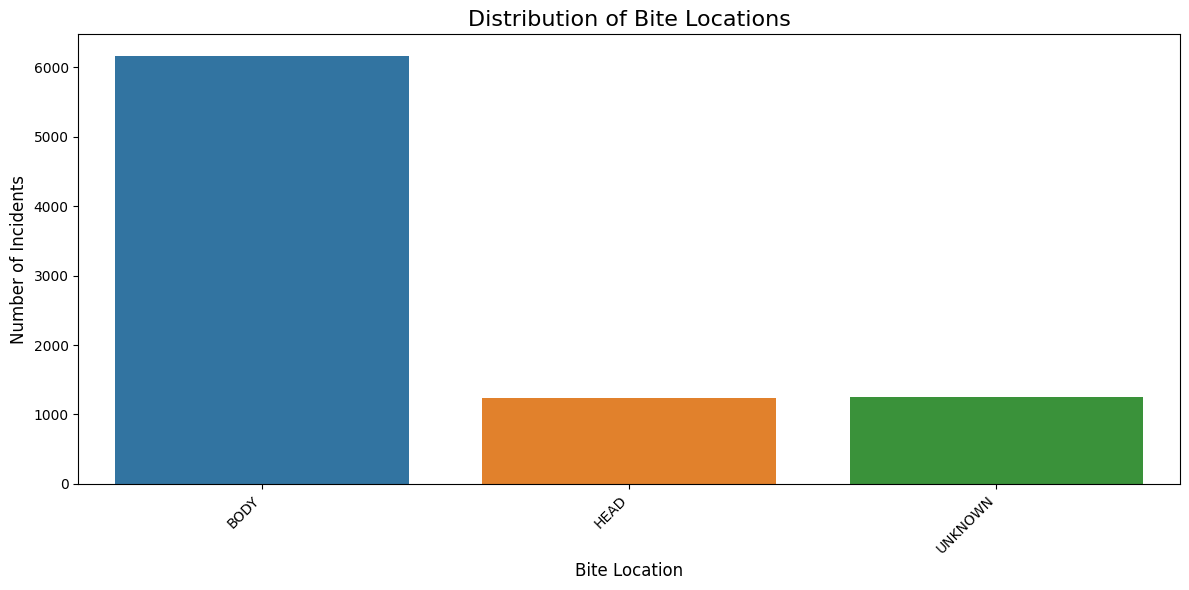

Top 5 Bite Locations:
WhereBittenIDDesc
BODY       6166
UNKNOWN    1248
HEAD       1234
Name: count, dtype: int64


/tmp/ipykernel_18/3725137487.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bite_location_by_species = df.groupby('SpeciesIDDesc')['WhereBittenIDDesc'].value_counts(normalize=True).unstack()


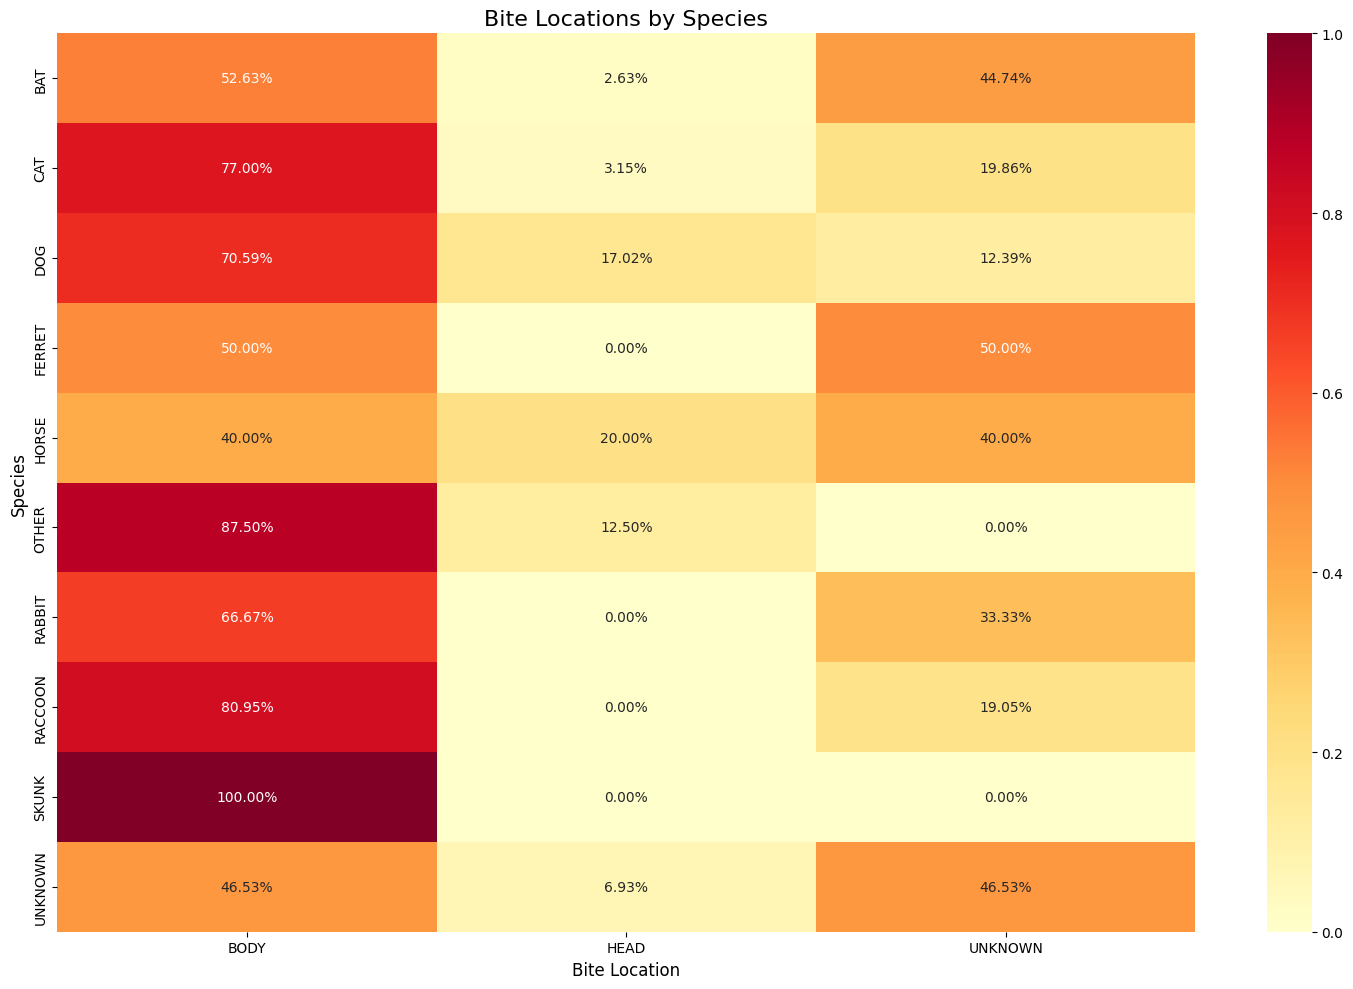

Top 3 Bite Locations by Species:
BAT:
  BODY: 52.63%
  UNKNOWN: 44.74%
  HEAD: 2.63%
CAT:
  BODY: 77.00%
  UNKNOWN: 19.86%
  HEAD: 3.15%
DOG:
  BODY: 70.59%
  HEAD: 17.02%
  UNKNOWN: 12.39%
FERRET:
  BODY: 50.00%
  UNKNOWN: 50.00%
  HEAD: 0.00%
HORSE:
  BODY: 40.00%
  UNKNOWN: 40.00%
  HEAD: 20.00%
OTHER:
  BODY: 87.50%
  HEAD: 12.50%
  UNKNOWN: 0.00%
RABBIT:
  BODY: 66.67%
  UNKNOWN: 33.33%
  HEAD: 0.00%
RACCOON:
  BODY: 80.95%
  UNKNOWN: 19.05%
  HEAD: 0.00%
SKUNK:
  BODY: 100.00%
  HEAD: 0.00%
  UNKNOWN: 0.00%
UNKNOWN:
  BODY: 46.53%
  UNKNOWN: 46.53%
  HEAD: 6.93%
Analysis complete.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Overall bite location distribution
bite_location_counts = df['WhereBittenIDDesc'].value_counts()

# Plot overall bite location distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=bite_location_counts.index, y=bite_location_counts.values)
plt.title('Distribution of Bite Locations', fontsize=16)
plt.xlabel('Bite Location', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 5 bite locations
print("Top 5 Bite Locations:")
print(bite_location_counts.head())

# Bite location by species
bite_location_by_species = df.groupby('SpeciesIDDesc')['WhereBittenIDDesc'].value_counts(normalize=True).unstack()

# Plot heatmap of bite locations by species
plt.figure(figsize=(15, 10))
sns.heatmap(bite_location_by_species, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Bite Locations by Species', fontsize=16)
plt.xlabel('Bite Location', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.tight_layout()
plt.show()

# Top 3 bite locations for each species
print("\
Top 3 Bite Locations by Species:")
for species in bite_location_by_species.index:
    top_3 = bite_location_by_species.loc[species].nlargest(3)
    print(f"\
{species}:")
    for location, percentage in top_3.items():
        print(f"  {location}: {percentage:.2%}")

print("\
Analysis complete.")

**Key Observations:**

*  Body bites are the most common across all species.
*  Dogs have a higher percentage of head bites compared to other species.
*  Cats have a higher percentage of body bites compared to dogs.
*  Bats have a high percentage of unknown bite locations, which could be due to the nature of bat encounters or reporting issues.
*  Smaller animals (rabbits, skunks) show 100% body bites, possibly due to their size and the way humans interact with them.
*  There's significant variation in the distribution of bite locations among different species.

**Implications:**

*    Safety measures: Focus on protecting the body as it's the most common bite location across species.
*    Dog-specific precautions: Extra attention to protecting the head when dealing with dogs.
*    Reporting improvements: High percentages of unknown locations for some species suggest a need for better reporting practices.
*    Species-specific education: Tailor bite prevention education based on the most common bite locations for each species.
*    Medical response: Healthcare providers should be aware of the most likely bite locations for different species to guide examination and treatment.


### Are there any seasonal trends in animal bite incidents?

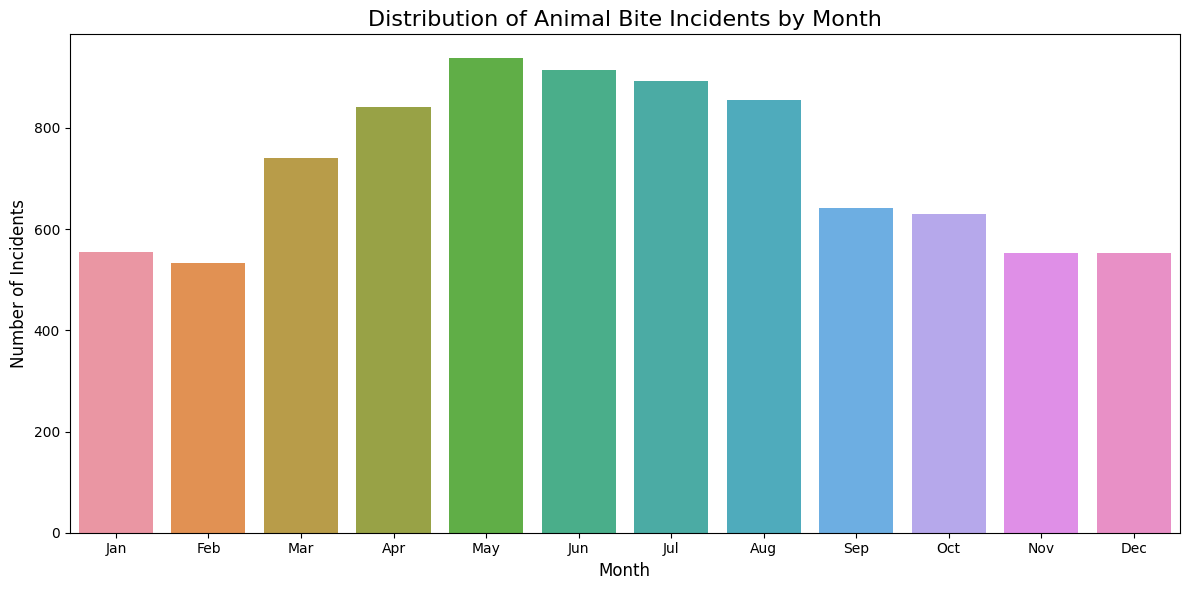

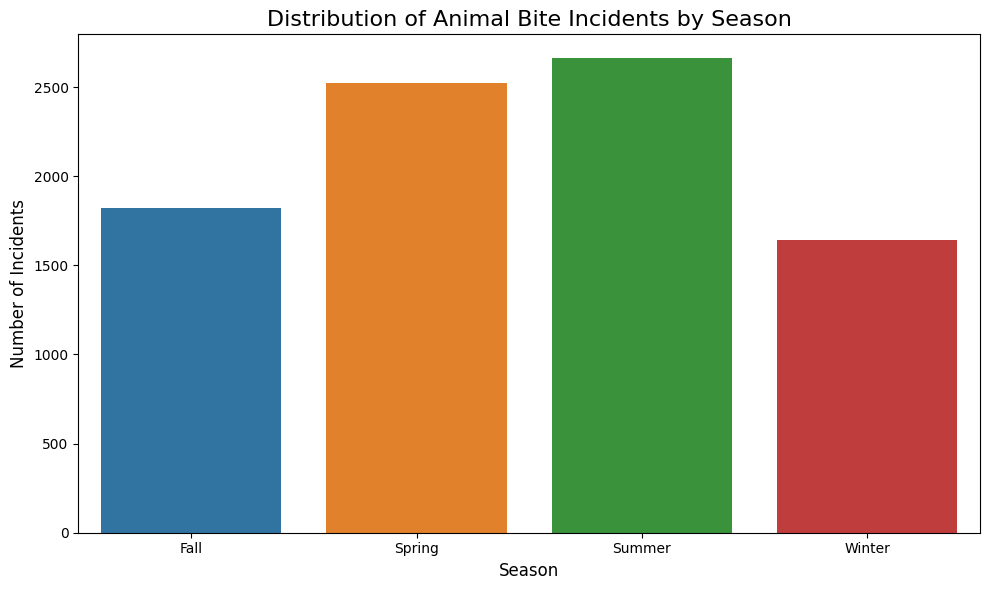

Monthly Distribution of Bite Incidents:
month
1     554
2     534
3     741
4     842
5     938
6     915
7     893
8     855
9     642
10    630
11    552
12    552
Name: count, dtype: int64
Seasonal Distribution of Bite Incidents:
season
Fall      1824
Spring    2521
Summer    2663
Winter    1640
Name: count, dtype: int64
Percentage increase from lowest month (2) to highest month (5): 75.66%
Top 3 months for animal bite incidents:
Month 5: 938 incidents
Month 6: 915 incidents
Month 7: 893 incidents
Analysis complete.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract month and season from bite_date
df['month'] = df['bite_date'].dt.month
df['season'] = df['bite_date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 
                                             4: 'Spring', 5: 'Spring', 6: 'Summer',
                                             7: 'Summer', 8: 'Summer', 9: 'Fall',
                                             10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Monthly distribution
monthly_bites = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bites.index, y=monthly_bites.values)
plt.title('Distribution of Animal Bite Incidents by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Seasonal distribution
seasonal_bites = df['season'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_bites.index, y=seasonal_bites.values)
plt.title('Distribution of Animal Bite Incidents by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Monthly Distribution of Bite Incidents:")
print(monthly_bites)

print("\
Seasonal Distribution of Bite Incidents:")
print(seasonal_bites)

# Calculate percentage increase from lowest to highest month
min_month = monthly_bites.idxmin()
max_month = monthly_bites.idxmax()
percentage_increase = ((monthly_bites[max_month] - monthly_bites[min_month]) / monthly_bites[min_month]) * 100

print(f"\
Percentage increase from lowest month ({min_month}) to highest month ({max_month}): {percentage_increase:.2f}%")

# Top 3 months
top_3_months = monthly_bites.nlargest(3)
print("\
Top 3 months for animal bite incidents:")
for month, count in top_3_months.items():
    print(f"Month {month}: {count} incidents")

print("\
Analysis complete.")

**Key Observations:**

*    Peak Season: The warmer months (May, June, July) consistently show the highest number of animal bite incidents.

*    Off-Season: The colder months, particularly November through February, show the lowest number of incidents.

*    Transition Periods: There are noticeable increases in incidents during the transition from winter to spring (March-April) and decreases during the transition from summer to fall (September-October).

*    Magnitude of Seasonal Effect: The difference between the highest and lowest months is substantial, with a 76.31% increase from February to May.

**Implications and Possible Explanations:**

*    Increased Outdoor Activity: The peak in warmer months likely correlates with increased outdoor activities, leading to more human-animal interactions.

*    Animal Behavior: Some animals may be more active or aggressive during warmer months, possibly due to mating seasons or protecting young.

*    Clothing Differences: Lighter clothing worn in warmer months may provide less protection against animal bites.
 
*    Holiday Periods: The slight increase in December compared to November might be related to holiday activities or travel.

*    Public Health Planning: Resources for animal bite prevention and treatment should be allocated with these seasonal trends in mind.

*    Education and Awareness: Public education campaigns about animal bite prevention could be intensified before and during peak seasons.

*    Animal Control Measures: Authorities might consider increasing animal control efforts during high-risk months.


# Conclusion

In conclusion, this deep dive into urban animal bite incidents reveals critical insights for public health and urban planning. The analysis highlights several key points that demand attention from policymakers and public health officials.

Dogs emerge as the primary concern, accounting for over 75% of all reported cases, underlining the importance of responsible pet ownership and effective dog safety education. Cats follow as the second most common source of bites, with wildlife such as bats and raccoons contributing to a smaller but significant portion of incidents.

A striking finding is the high proportion of incidents involving animals with unknown vaccination status - over 50% of all cases. This gap in our knowledge presents a significant public health risk and highlights the urgent need for improved vaccination tracking and reporting systems.

The analysis of bite locations shows that the majority occur on the body (69%), with a significant portion (13.8%) on the head. This information is valuable for both preventive education and medical response protocols.

Key recommendations include:

*    Strengthening public education on animal safety, focusing on dog behavior and responsible pet ownership.
*    Improving animal vaccination tracking and reporting systems to reduce unknown vaccination status cases.
*    Enhancing animal control policies, particularly in urban areas.
*    Investing in research to understand geographical and seasonal patterns for more targeted interventions.
